# Project: Bayesian Analysis of Tropical Storms using Poisson Processes

In [1]:
# Create an activate a virtual environment, named `venv`
# !python3 -m venv .venv
!source .venv/bin/activate

In [2]:
# Install the `pandas`, `numpy`, `matplotlib`, and `seaborn` Python libraries.
!pip install pandas numpy matplotlib seaborn

## 1. Data Cleaning and Preprocessing

* Read in the `pacific.csv` dataset
* Handle missing data appropriately
* Convert data types as needed
* Create new features or transform existing ones if necessary
* Perform exploratory data analysis to understand distributions, relationships, outliers etc.

In [3]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First few rows of the data:
         ID                 Name      Date  Time Event Status Latitude  \
0  EP011949              UNNAMED  19490611     0           TS    20.2N   
1  EP011949              UNNAMED  19490611   600           TS    20.2N   
2  EP011949              UNNAMED  19490611  1200           TS    20.2N   
3  EP011949              UNNAMED  19490611  1800           TS    20.3N   
4  EP011949              UNNAMED  19490612     0           TS    20.4N   

  Longitude  Maximum Wind  Minimum Pressure  ...  Low Wind SW  Low Wind NW  \
0    106.3W            45              -999  ...         -999         -999   
1    106.4W            45              -999  ...         -999         -999   
2    106.7W            45              -999  ...         -999         -999   
3    107.7W            45              -999  ...         -999         -999   
4    108.6W            45              -999  ...         -999         -999   

   Moderate Wind NE  Moderate Wind SE  Moderate Wind SW  M

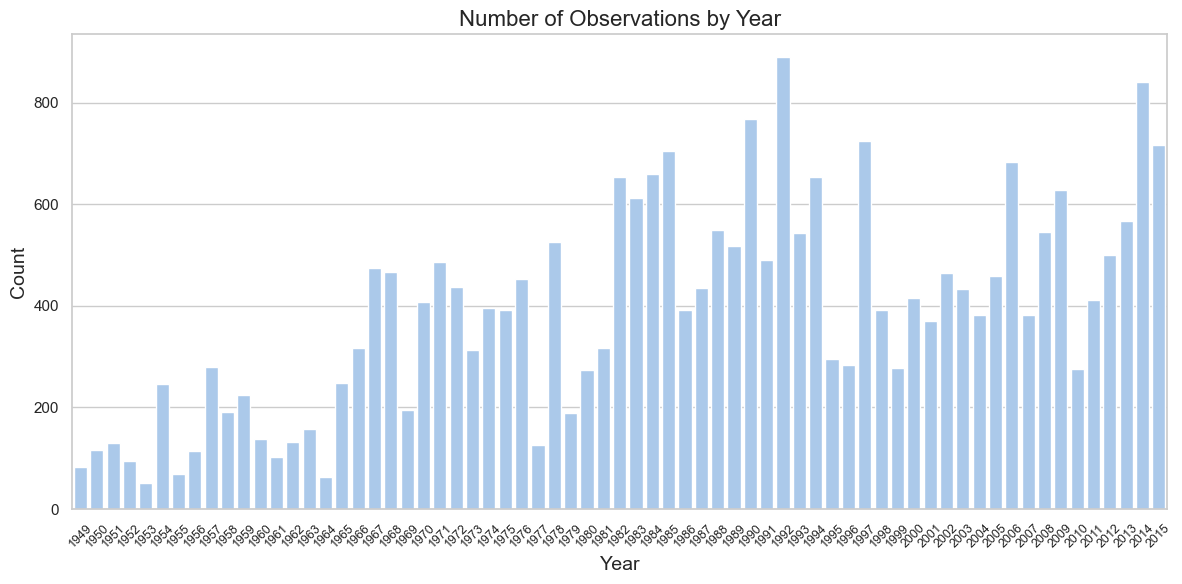

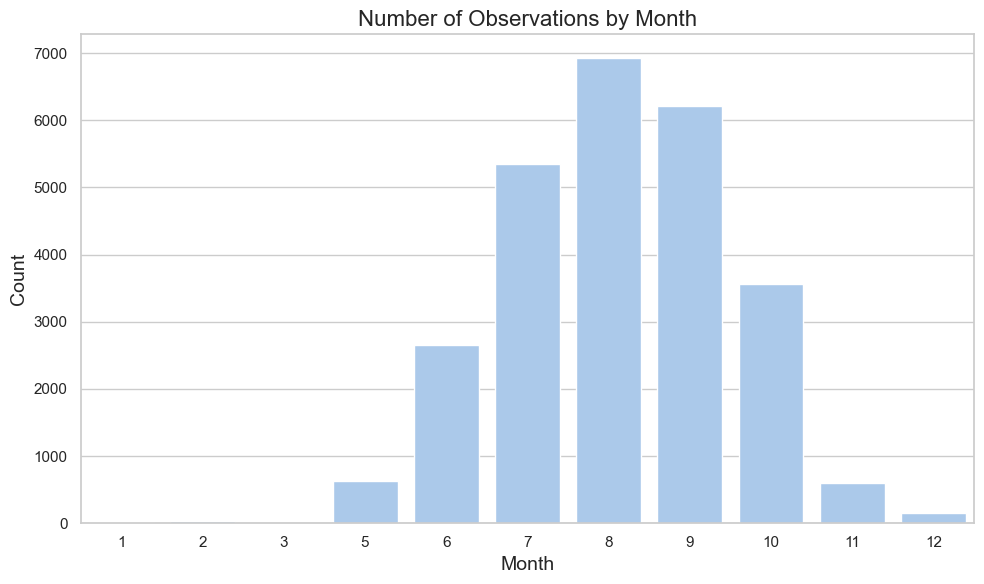

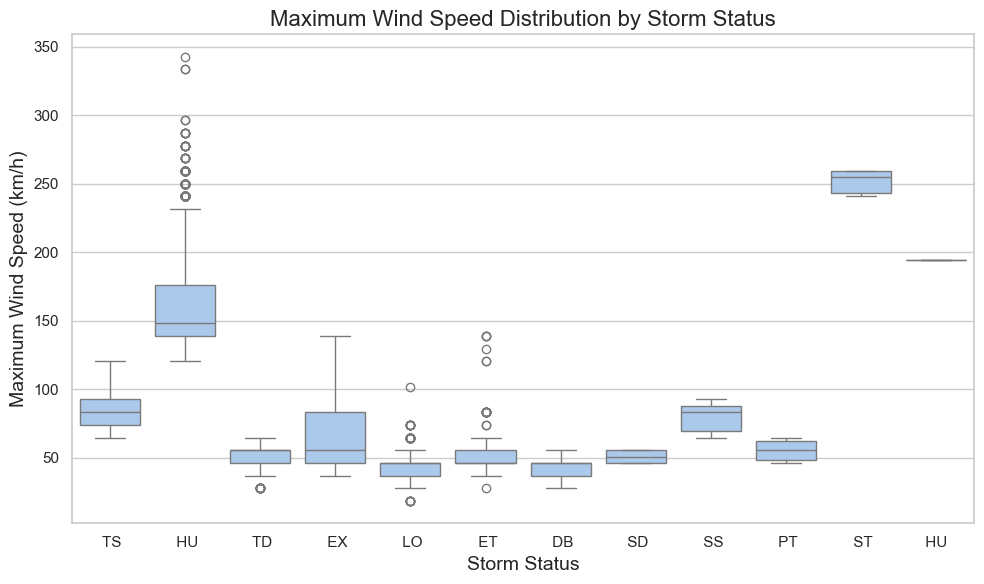


Summary statistics:
                                Date          Time  Maximum Wind  \
count                          26137  26137.000000  26137.000000   
mean   1989-06-16 12:49:36.745609728    896.050427     90.654185   
min              1949-06-11 00:00:00      0.000000     18.520000   
25%              1976-08-13 00:00:00      0.000000     55.560000   
50%              1990-08-13 00:00:00    600.000000     83.340000   
75%              2003-09-15 00:00:00   1200.000000    120.380000   
max              2015-11-29 00:00:00   2300.000000    342.620000   
std                              NaN    672.008065     46.919402   

       Minimum Pressure   Low Wind NE   Low Wind SE   Low Wind SW  \
count      26137.000000  26137.000000  26137.000000  26137.000000   
mean          18.176225   -745.064851   -746.312125   -748.290929   
min         -999.000000   -999.000000   -999.000000   -999.000000   
25%         -999.000000   -999.000000   -999.000000   -999.000000   
50%          941.0000

In [4]:
# Read in the data from the CSV file
data = pd.read_csv('pacific.csv')

# Print the first few rows of the data to get an overview
print("First few rows of the data:")
print(data.head())

# Check the data types of each column
print("\nData types of each column:")
print(data.dtypes)

# Convert the 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')

# Extract year, month, and day from the 'Date' column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Check for missing values in each column
print("\nMissing values in each column:")
print(data.isnull().sum())

# Handle missing data by dropping rows with missing values in specific columns
data = data.dropna(subset=['Latitude', 'Longitude', 'Maximum Wind'])

# Convert wind speed from knots to kilometers per hour (km/h)
data['Maximum Wind'] = data['Maximum Wind'] * 1.852


# Set the aesthetic style of the plots
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set_context("notebook")

# Perform exploratory data analysis
# Plot the number of observations by year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=data)
plt.xticks(rotation=45, fontsize=9)  # Adjust the fontsize for x-axis tick labels
plt.title('Number of Observations by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

# Plot the number of observations by month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=data)
plt.title('Number of Observations by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

# Plot the distribution of maximum wind speed by storm status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Maximum Wind', data=data)
plt.title('Maximum Wind Speed Distribution by Storm Status', fontsize=16)
plt.xlabel('Storm Status', fontsize=14)
plt.ylabel('Maximum Wind Speed (km/h)', fontsize=14)
plt.tight_layout()
plt.show()

# Print summary statistics of the data
print("\nSummary statistics:")
print(data.describe())

## 2. Model Building and Initial MCMC

* Propose reasonable Bayesian models to describe the hurricane data generating process
* Use Poisson processes to model hurricane counts
* Incorporate relevant covariates like location, time, intensity metrics into models
* Set up MCMC algorithms to estimate posterior distributions of model parameters
* Run MCMC, check convergence and mixing, summarize posterior estimates

In [5]:
# Install the `pymc` librar for Bayesian analysis
!pip install pymc

In [12]:
# Import the `pymc` library
import pymc as pm
# !pip show pymc

Name: pymc
Version: 5.17.0
Summary: Probabilistic Programming in Python: Bayesian Modeling and Probabilistic Machine Learning with PyTensor
Home-page: http://github.com/pymc-devs/pymc
Author: 
Author-email: 
License: Apache License, Version 2.0
Location: /Users/vandert/Desktop/Bayesian_Statistical_Methods_and_Data_Analysis/.venv/lib/python3.12/site-packages
Requires: arviz, cachetools, cloudpickle, numpy, pandas, pytensor, rich, scipy, threadpoolctl, typing-extensions
Required-by: 


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [td_rate, ts_rate, hu_rate]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


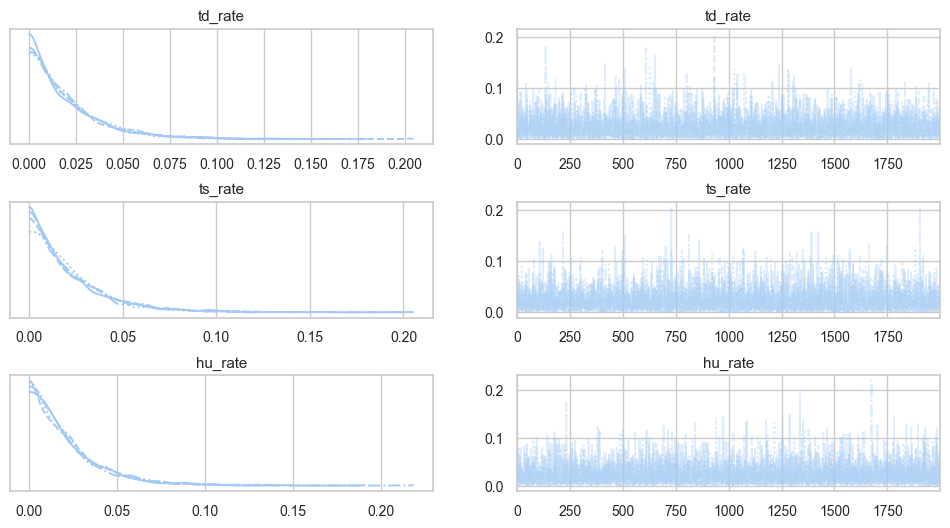

          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
td_rate  0.021  0.020     0.0    0.058        0.0      0.0    4248.0   
ts_rate  0.021  0.021     0.0    0.060        0.0      0.0    3997.0   
hu_rate  0.022  0.021     0.0    0.059        0.0      0.0    4069.0   

         ess_tail  r_hat  
td_rate    3160.0    1.0  
ts_rate    2842.0    1.0  
hu_rate    2740.0    1.0  


In [14]:
# Subset the data to only include years with complete data (e.g., from 1970 onwards)
data_complete = data[data['Year'] >= 1970]

# Aggregate the data by year and storm status
data_agg = data_complete.groupby(['Year', 'Status']).size().reset_index(name='Counts')

# Pivot the table to get counts by storm status and year
data_pivot = data_agg.pivot(index='Year', columns='Status', values='Counts').reset_index()
data_pivot = data_pivot.fillna(0)

# Check if the necessary columns exist and handle missing columns
td_counts = data_pivot['TD'].values if 'TD' in data_pivot else [0] * len(data_pivot)
ts_counts = data_pivot['TS'].values if 'TS' in data_pivot else [0] * len(data_pivot)
hu_counts = data_pivot['HU'].values if 'HU' in data_pivot else [0] * len(data_pivot)

# Build the initial model using PyMC3
with pm.Model() as model:
    # Define priors for the Poisson rates
    td_rate = pm.Gamma('td_rate', alpha=1, beta=1)
    ts_rate = pm.Gamma('ts_rate', alpha=1, beta=1)
    hu_rate = pm.Gamma('hu_rate', alpha=1, beta=1)
    
    # Define the Poisson likelihood for each storm type
    td_obs = pm.Poisson('td_obs', mu=td_rate, observed=td_counts)
    ts_obs = pm.Poisson('ts_obs', mu=ts_rate, observed=ts_counts)
    hu_obs = pm.Poisson('hu_obs', mu=hu_rate, observed=hu_counts)

    # Sample from the posterior distribution using MCMC
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Plot the posterior distributions of the model parameters
pm.plot_trace(trace)

# Adjust the vertical space between plots
plt.subplots_adjust(hspace=0.5)  # Increase hspace to add more vertical space

plt.show()

# Print the summary statistics of the posterior distributions
print(pm.summary(trace))

## 3. Model Checking

* Use posterior predictive checks to assess model fit and assumptions
* Check if models can replicate important features of observed data
* Identify any systematic discrepancies between models and data
* Refine models based on model checking results

In [8]:
# Install the `arviz` library for visualizing the posterior distributions.
!pip install arviz

In [9]:
# Import the `arviz` library
import arviz as az

Sampling: [hu_obs, td_obs, ts_obs]


Output()

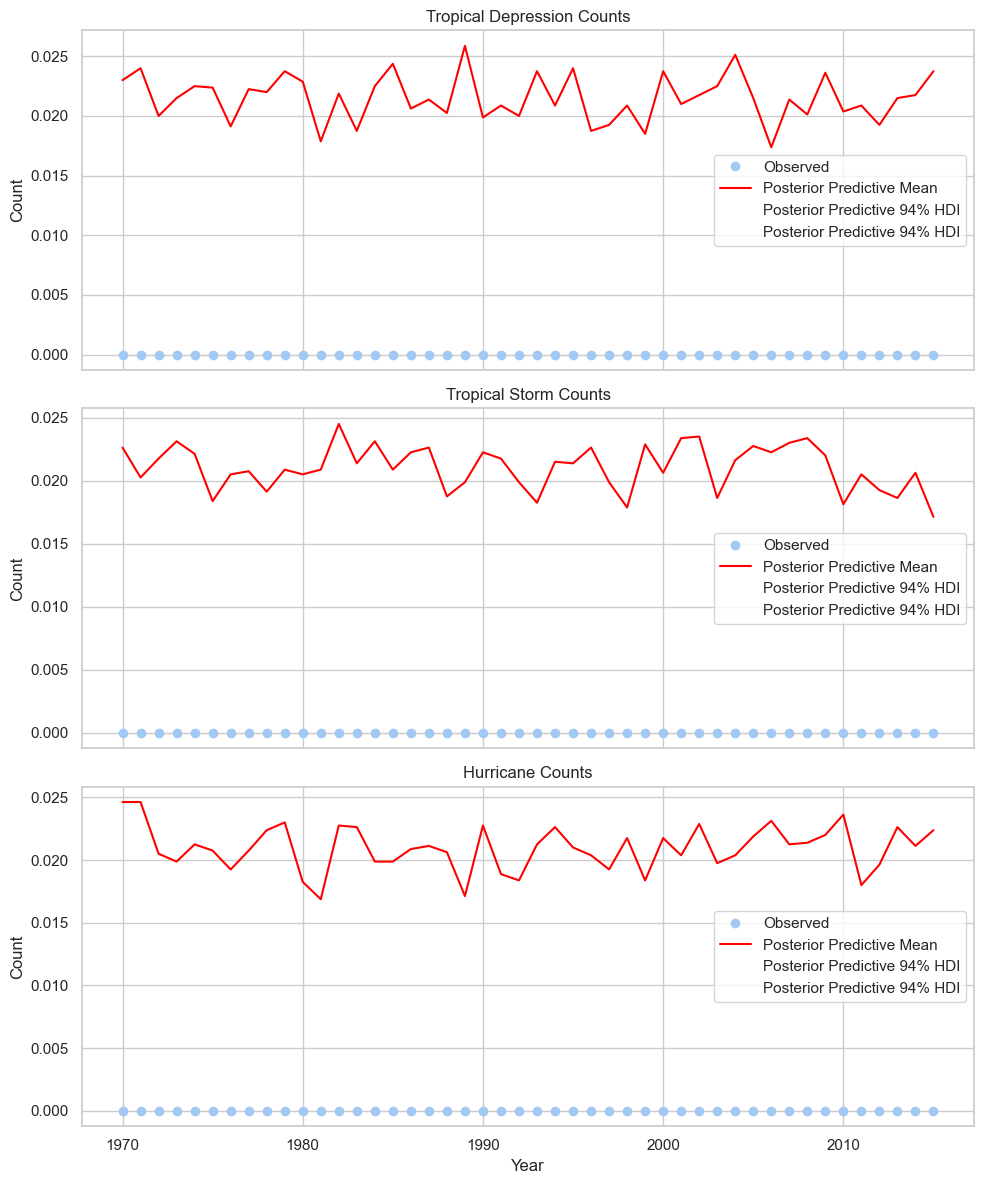

Bayesian p-values:


AttributeError: module 'arviz' has no attribute 'bpv'

In [13]:
# Perform posterior predictive checks
with model:
    ppc = pm.sample_posterior_predictive(
        trace,
        var_names=['td_obs', 'ts_obs', 'hu_obs'],
        random_seed=42,
        progressbar=True,
        return_inferencedata=True
    )

# Plot the observed counts vs. the posterior predictive counts
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Tropical Depression Counts
ax = axes[0]
ax.plot(data_pivot['Year'], td_counts, 'o', label='Observed')
ax.plot(data_pivot['Year'], ppc.posterior_predictive['td_obs'].mean(axis=(0, 1)), 'r', label='Posterior Predictive Mean')
az.plot_hdi(data_pivot['Year'], ppc.posterior_predictive['td_obs'], ax=ax, fill_kwargs={'alpha': 0.1}, plot_kwargs={'label': 'Posterior Predictive 94% HDI'})
ax.set_title('Tropical Depression Counts')
ax.set_ylabel('Count')
ax.legend()

# Tropical Storm Counts
ax = axes[1]
ax.plot(data_pivot['Year'], ts_counts, 'o', label='Observed')
ax.plot(data_pivot['Year'], ppc.posterior_predictive['ts_obs'].mean(axis=(0, 1)), 'r', label='Posterior Predictive Mean')
az.plot_hdi(data_pivot['Year'], ppc.posterior_predictive['ts_obs'], ax=ax, fill_kwargs={'alpha': 0.1}, plot_kwargs={'label': 'Posterior Predictive 94% HDI'})
ax.set_title('Tropical Storm Counts')
ax.set_ylabel('Count')
ax.legend()

# Hurricane Counts
ax = axes[2]
ax.plot(data_pivot['Year'], hu_counts, 'o', label='Observed')
ax.plot(data_pivot['Year'], ppc.posterior_predictive['hu_obs'].mean(axis=(0, 1)), 'r', label='Posterior Predictive Mean')
az.plot_hdi(data_pivot['Year'], ppc.posterior_predictive['hu_obs'], ax=ax, fill_kwargs={'alpha': 0.1}, plot_kwargs={'label': 'Posterior Predictive 94% HDI'})
ax.set_title('Hurricane Counts')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.legend()

plt.tight_layout()
plt.show()

# Compute and print the Bayesian p-values for each storm type
print("Bayesian p-values:")
print("Tropical Depression:", az.bpv(ppc, 'td_obs'))
print("Tropical Storm:", az.bpv(ppc, 'ts_obs'))
print("Hurricane:", az.bpv(ppc, 'hu_obs'))

## 4. Model Comparison

* Compare multiple candidate models
* Use cross-validation or information criteria (e.g. WAIC) for model comparison
* Identify models that balance fit and complexity
* Select final model(s) for inference and prediction

## 5. Model Refinement

* Incorporate insights from model checking and comparison
* Test additional covariates, interaction terms, non-linear effects
* Consider more flexible model structures if needed
* Re-run MCMC for refined models and repeat model checking/comparison

## 6. Summarize Findings

* Describe the final selected model(s)
* Report key model parameters and their uncertainties
* Discuss goodness of fit and model assumptions
* Interpret covariate effects on hurricane patterns
* Quantify uncertainties in parameters and predictions